# Convolutional Net for MNIST

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from collections import Counter

import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

from src.classifier import MnistClassifier

torch.manual_seed(42)

## Dataset setup

In [3]:
dataset = datasets.MNIST(root='./datasets', train=True, transform=transforms.ToTensor(), download=True)
dataset = [elem for idx, elem in enumerate(dataset) if idx < 30000]
print(f"Dataset size: {len(dataset)}")
print(f"Input image shape: {dataset[0][0].shape}")

Dataset size: 30000
Input image shape: torch.Size([1, 28, 28])


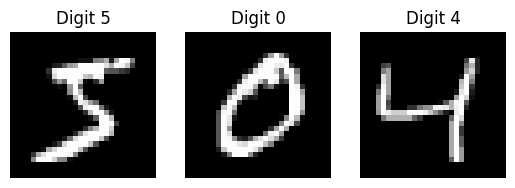

In [4]:
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(dataset[i][0].numpy().squeeze(), cmap="grey")
    plt.title(f"Digit {dataset[i][1]}")
    plt.axis("off")

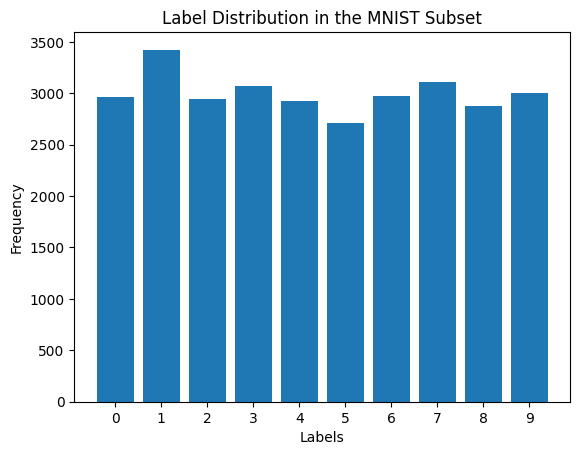

In [5]:
labels = [label for _, label in dataset]
label_counts = Counter(labels)

plt.bar(label_counts.keys(), label_counts.values())
plt.title("Label Distribution in the MNIST Subset")
plt.xlabel("Labels")
plt.ylabel("Frequency")
plt.xticks(range(10))
plt.show()

## Train model

In [6]:
train_split_idx = len(dataset) * 3 // 4
train_ds, valid_ds = torch.utils.data.random_split(dataset, [train_split_idx, len(dataset) - train_split_idx])
print(f"Train dataset size: {len(train_ds)}")
print(f"Validation dataset size: {len(valid_ds)}")

Train dataset size: 22500
Validation dataset size: 7500


In [7]:
train_dl = torch.utils.data.DataLoader(train_ds, batch_size=2048, shuffle=True)
valid_dl = torch.utils.data.DataLoader(valid_ds, batch_size=2048, shuffle=False)
print(f"Train dataloader size: {len(train_dl)}")
print(f"Validation dataloader size: {len(valid_dl)}")

Train dataloader size: 11
Validation dataloader size: 4


In [8]:
epochs = 100
model = MnistClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

metrics = []
for epoch in range(1, epochs + 1):
    # Training step
    model.train()
    train_loss = 0
    correct, total = 0, 0
    for images, labels in tqdm.tqdm(train_dl, desc=f"Train epoch {epoch}: "):
        # Forward pass
        preds = model(images)
        loss = criterion(preds, labels)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Metrics logging
        train_loss += loss.item()
        total += labels.shape[0]
        _, predicted = torch.max(preds, dim=1)
        correct += (predicted == labels).sum(dim=0)
    
    train_loss /= len(train_dl)
    train_accuracy = correct / total
    
    # Validation step
    model.eval()
    valid_loss = 0.0
    correct, total = 0, 0

    with torch.no_grad():
        for images, labels in tqdm.tqdm(valid_dl, desc=f"Validation epoch {epoch}: "):
            images, labels = images, labels

            outputs = model(images)
            loss = criterion(outputs, labels)

            valid_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    valid_loss /= len(valid_dl)
    valid_accuracy = correct / total
    
    # Log the metrics
    print(f"Epoch {epoch}\n{train_loss = :.4f}, {train_accuracy = :.2f}\n{valid_loss = :.4f}, {valid_accuracy = :.2f}")
    metrics.append({
        "train_loss": train_loss,
        "train_accuracy": train_accuracy,
        "valid_loss": valid_loss,
        "valid_accuracy": valid_accuracy,
    })

Validation epoch 1: 100%|██████████| 4/4 [00:00<00:00, 26.03it/s]


Epoch 1
train_loss = 2.3029, train_accuracy = 0.10
valid_loss = 2.2964, valid_accuracy = 0.11


Validation epoch 2: 100%|██████████| 4/4 [00:00<00:00, 27.30it/s]


Epoch 2
train_loss = 2.2897, train_accuracy = 0.14
valid_loss = 2.2771, valid_accuracy = 0.23


Validation epoch 3: 100%|██████████| 4/4 [00:00<00:00, 27.41it/s]


Epoch 3
train_loss = 2.2619, train_accuracy = 0.33
valid_loss = 2.2353, valid_accuracy = 0.43


Validation epoch 4: 100%|██████████| 4/4 [00:00<00:00, 27.56it/s]


Epoch 4
train_loss = 2.2036, train_accuracy = 0.47
valid_loss = 2.1514, valid_accuracy = 0.52


Validation epoch 5: 100%|██████████| 4/4 [00:00<00:00, 27.59it/s]


Epoch 5
train_loss = 2.0939, train_accuracy = 0.52
valid_loss = 2.0057, valid_accuracy = 0.55


Validation epoch 6: 100%|██████████| 4/4 [00:00<00:00, 26.66it/s]


Epoch 6
train_loss = 1.9190, train_accuracy = 0.56
valid_loss = 1.7931, valid_accuracy = 0.58


Validation epoch 7: 100%|██████████| 4/4 [00:00<00:00, 22.19it/s]


Epoch 7
train_loss = 1.6806, train_accuracy = 0.61
valid_loss = 1.5317, valid_accuracy = 0.66


Validation epoch 8: 100%|██████████| 4/4 [00:00<00:00, 27.33it/s]


Epoch 8
train_loss = 1.4073, train_accuracy = 0.71
valid_loss = 1.2608, valid_accuracy = 0.76


Validation epoch 9: 100%|██████████| 4/4 [00:00<00:00, 27.33it/s]


Epoch 9
train_loss = 1.1474, train_accuracy = 0.80
valid_loss = 1.0279, valid_accuracy = 0.81


Validation epoch 10: 100%|██████████| 4/4 [00:00<00:00, 27.86it/s]


Epoch 10
train_loss = 0.9375, train_accuracy = 0.83
valid_loss = 0.8580, valid_accuracy = 0.83


Validation epoch 11: 100%|██████████| 4/4 [00:00<00:00, 28.37it/s]


Epoch 11
train_loss = 0.7869, train_accuracy = 0.85
valid_loss = 0.7446, valid_accuracy = 0.85


Validation epoch 12: 100%|██████████| 4/4 [00:00<00:00, 22.40it/s]


Epoch 12
train_loss = 0.6863, train_accuracy = 0.86
valid_loss = 0.6730, valid_accuracy = 0.86


Validation epoch 13: 100%|██████████| 4/4 [00:00<00:00, 25.51it/s]


Epoch 13
train_loss = 0.6186, train_accuracy = 0.88
valid_loss = 0.6215, valid_accuracy = 0.87


Validation epoch 14: 100%|██████████| 4/4 [00:00<00:00, 25.02it/s]


Epoch 14
train_loss = 0.5700, train_accuracy = 0.88
valid_loss = 0.5857, valid_accuracy = 0.88


Validation epoch 15: 100%|██████████| 4/4 [00:00<00:00, 27.10it/s]


Epoch 15
train_loss = 0.5341, train_accuracy = 0.89
valid_loss = 0.5586, valid_accuracy = 0.88


Validation epoch 16: 100%|██████████| 4/4 [00:00<00:00, 26.57it/s]


Epoch 16
train_loss = 0.5058, train_accuracy = 0.90
valid_loss = 0.5364, valid_accuracy = 0.89


Validation epoch 17: 100%|██████████| 4/4 [00:00<00:00, 27.74it/s]


Epoch 17
train_loss = 0.4819, train_accuracy = 0.90
valid_loss = 0.5154, valid_accuracy = 0.89


Validation epoch 18: 100%|██████████| 4/4 [00:00<00:00, 25.23it/s]


Epoch 18
train_loss = 0.4630, train_accuracy = 0.90
valid_loss = 0.5036, valid_accuracy = 0.89


Validation epoch 19: 100%|██████████| 4/4 [00:00<00:00, 27.07it/s]


Epoch 19
train_loss = 0.4453, train_accuracy = 0.91
valid_loss = 0.4856, valid_accuracy = 0.90


Validation epoch 20: 100%|██████████| 4/4 [00:00<00:00, 27.52it/s]


Epoch 20
train_loss = 0.4297, train_accuracy = 0.91
valid_loss = 0.4750, valid_accuracy = 0.90


Validation epoch 21: 100%|██████████| 4/4 [00:00<00:00, 25.75it/s]


Epoch 21
train_loss = 0.4158, train_accuracy = 0.91
valid_loss = 0.4611, valid_accuracy = 0.90


Validation epoch 22: 100%|██████████| 4/4 [00:00<00:00, 25.94it/s]


Epoch 22
train_loss = 0.4032, train_accuracy = 0.91
valid_loss = 0.4528, valid_accuracy = 0.90


Validation epoch 23: 100%|██████████| 4/4 [00:00<00:00, 27.74it/s]


Epoch 23
train_loss = 0.3918, train_accuracy = 0.92
valid_loss = 0.4405, valid_accuracy = 0.91


Validation epoch 24: 100%|██████████| 4/4 [00:00<00:00, 27.76it/s]


Epoch 24
train_loss = 0.3813, train_accuracy = 0.92
valid_loss = 0.4341, valid_accuracy = 0.91


Validation epoch 25: 100%|██████████| 4/4 [00:00<00:00, 27.73it/s]


Epoch 25
train_loss = 0.3693, train_accuracy = 0.92
valid_loss = 0.4229, valid_accuracy = 0.91


Validation epoch 26: 100%|██████████| 4/4 [00:00<00:00, 27.71it/s]


Epoch 26
train_loss = 0.3605, train_accuracy = 0.92
valid_loss = 0.4158, valid_accuracy = 0.91


Validation epoch 27: 100%|██████████| 4/4 [00:00<00:00, 27.28it/s]


Epoch 27
train_loss = 0.3506, train_accuracy = 0.93
valid_loss = 0.4086, valid_accuracy = 0.92


Validation epoch 28: 100%|██████████| 4/4 [00:00<00:00, 27.15it/s]


Epoch 28
train_loss = 0.3413, train_accuracy = 0.93
valid_loss = 0.3999, valid_accuracy = 0.92


Validation epoch 29: 100%|██████████| 4/4 [00:00<00:00, 27.34it/s]


Epoch 29
train_loss = 0.3323, train_accuracy = 0.93
valid_loss = 0.3948, valid_accuracy = 0.92


Validation epoch 30: 100%|██████████| 4/4 [00:00<00:00, 27.68it/s]


Epoch 30
train_loss = 0.3256, train_accuracy = 0.93
valid_loss = 0.3895, valid_accuracy = 0.92


Validation epoch 31: 100%|██████████| 4/4 [00:00<00:00, 27.66it/s]


Epoch 31
train_loss = 0.3183, train_accuracy = 0.93
valid_loss = 0.3801, valid_accuracy = 0.92


Validation epoch 32: 100%|██████████| 4/4 [00:00<00:00, 27.94it/s]


Epoch 32
train_loss = 0.3098, train_accuracy = 0.93
valid_loss = 0.3733, valid_accuracy = 0.92


Validation epoch 33: 100%|██████████| 4/4 [00:00<00:00, 27.92it/s]


Epoch 33
train_loss = 0.3017, train_accuracy = 0.94
valid_loss = 0.3666, valid_accuracy = 0.92


Validation epoch 34: 100%|██████████| 4/4 [00:00<00:00, 27.14it/s]


Epoch 34
train_loss = 0.2950, train_accuracy = 0.94
valid_loss = 0.3644, valid_accuracy = 0.92


Validation epoch 35: 100%|██████████| 4/4 [00:00<00:00, 27.90it/s]


Epoch 35
train_loss = 0.2874, train_accuracy = 0.94
valid_loss = 0.3565, valid_accuracy = 0.93


Validation epoch 36: 100%|██████████| 4/4 [00:00<00:00, 27.76it/s]


Epoch 36
train_loss = 0.2822, train_accuracy = 0.94
valid_loss = 0.3495, valid_accuracy = 0.93


Validation epoch 37: 100%|██████████| 4/4 [00:00<00:00, 27.49it/s]


Epoch 37
train_loss = 0.2738, train_accuracy = 0.94
valid_loss = 0.3435, valid_accuracy = 0.93


Validation epoch 38: 100%|██████████| 4/4 [00:00<00:00, 27.49it/s]


Epoch 38
train_loss = 0.2671, train_accuracy = 0.94
valid_loss = 0.3376, valid_accuracy = 0.93


Validation epoch 39: 100%|██████████| 4/4 [00:00<00:00, 27.40it/s]


Epoch 39
train_loss = 0.2610, train_accuracy = 0.94
valid_loss = 0.3362, valid_accuracy = 0.93


Validation epoch 40: 100%|██████████| 4/4 [00:00<00:00, 27.82it/s]


Epoch 40
train_loss = 0.2553, train_accuracy = 0.94
valid_loss = 0.3288, valid_accuracy = 0.93


Validation epoch 41: 100%|██████████| 4/4 [00:00<00:00, 28.10it/s]


Epoch 41
train_loss = 0.2493, train_accuracy = 0.95
valid_loss = 0.3230, valid_accuracy = 0.94


Validation epoch 42: 100%|██████████| 4/4 [00:00<00:00, 27.63it/s]


Epoch 42
train_loss = 0.2436, train_accuracy = 0.95
valid_loss = 0.3198, valid_accuracy = 0.94


Validation epoch 43: 100%|██████████| 4/4 [00:00<00:00, 27.90it/s]


Epoch 43
train_loss = 0.2379, train_accuracy = 0.95
valid_loss = 0.3149, valid_accuracy = 0.94


Validation epoch 44: 100%|██████████| 4/4 [00:00<00:00, 27.74it/s]


Epoch 44
train_loss = 0.2330, train_accuracy = 0.95
valid_loss = 0.3103, valid_accuracy = 0.94


Validation epoch 45: 100%|██████████| 4/4 [00:00<00:00, 27.55it/s]


Epoch 45
train_loss = 0.2277, train_accuracy = 0.95
valid_loss = 0.3068, valid_accuracy = 0.94


Validation epoch 46: 100%|██████████| 4/4 [00:00<00:00, 27.84it/s]


Epoch 46
train_loss = 0.2226, train_accuracy = 0.95
valid_loss = 0.3029, valid_accuracy = 0.94


Validation epoch 47: 100%|██████████| 4/4 [00:00<00:00, 27.64it/s]


Epoch 47
train_loss = 0.2179, train_accuracy = 0.95
valid_loss = 0.2975, valid_accuracy = 0.94


Validation epoch 48: 100%|██████████| 4/4 [00:00<00:00, 27.34it/s]


Epoch 48
train_loss = 0.2127, train_accuracy = 0.95
valid_loss = 0.2954, valid_accuracy = 0.94


Validation epoch 49: 100%|██████████| 4/4 [00:00<00:00, 27.28it/s]


Epoch 49
train_loss = 0.2090, train_accuracy = 0.95
valid_loss = 0.2920, valid_accuracy = 0.94


Validation epoch 50: 100%|██████████| 4/4 [00:00<00:00, 27.03it/s]


Epoch 50
train_loss = 0.2042, train_accuracy = 0.95
valid_loss = 0.2870, valid_accuracy = 0.94


Validation epoch 51: 100%|██████████| 4/4 [00:00<00:00, 27.56it/s]


Epoch 51
train_loss = 0.2006, train_accuracy = 0.96
valid_loss = 0.2871, valid_accuracy = 0.94


Validation epoch 52: 100%|██████████| 4/4 [00:00<00:00, 27.73it/s]


Epoch 52
train_loss = 0.1973, train_accuracy = 0.96
valid_loss = 0.2831, valid_accuracy = 0.95


Validation epoch 53: 100%|██████████| 4/4 [00:00<00:00, 27.36it/s]


Epoch 53
train_loss = 0.1923, train_accuracy = 0.96
valid_loss = 0.2817, valid_accuracy = 0.95


Validation epoch 54: 100%|██████████| 4/4 [00:00<00:00, 27.56it/s]


Epoch 54
train_loss = 0.1878, train_accuracy = 0.96
valid_loss = 0.2760, valid_accuracy = 0.95


Validation epoch 55: 100%|██████████| 4/4 [00:00<00:00, 19.37it/s]


Epoch 55
train_loss = 0.1839, train_accuracy = 0.96
valid_loss = 0.2739, valid_accuracy = 0.95


Validation epoch 56: 100%|██████████| 4/4 [00:00<00:00, 27.57it/s]


Epoch 56
train_loss = 0.1808, train_accuracy = 0.96
valid_loss = 0.2708, valid_accuracy = 0.95


Validation epoch 57: 100%|██████████| 4/4 [00:00<00:00, 27.63it/s]


Epoch 57
train_loss = 0.1768, train_accuracy = 0.96
valid_loss = 0.2689, valid_accuracy = 0.95


Validation epoch 58: 100%|██████████| 4/4 [00:00<00:00, 26.86it/s]


Epoch 58
train_loss = 0.1739, train_accuracy = 0.96
valid_loss = 0.2678, valid_accuracy = 0.95


Validation epoch 59: 100%|██████████| 4/4 [00:00<00:00, 27.24it/s]


Epoch 59
train_loss = 0.1707, train_accuracy = 0.96
valid_loss = 0.2628, valid_accuracy = 0.95


Validation epoch 60: 100%|██████████| 4/4 [00:00<00:00, 27.49it/s]


Epoch 60
train_loss = 0.1678, train_accuracy = 0.96
valid_loss = 0.2629, valid_accuracy = 0.95


Validation epoch 61: 100%|██████████| 4/4 [00:00<00:00, 27.49it/s]


Epoch 61
train_loss = 0.1658, train_accuracy = 0.96
valid_loss = 0.2583, valid_accuracy = 0.95


Validation epoch 62: 100%|██████████| 4/4 [00:00<00:00, 25.49it/s]


Epoch 62
train_loss = 0.1612, train_accuracy = 0.97
valid_loss = 0.2579, valid_accuracy = 0.95


Validation epoch 63: 100%|██████████| 4/4 [00:00<00:00, 24.27it/s]


Epoch 63
train_loss = 0.1580, train_accuracy = 0.97
valid_loss = 0.2558, valid_accuracy = 0.95


Validation epoch 64: 100%|██████████| 4/4 [00:00<00:00, 26.37it/s]


Epoch 64
train_loss = 0.1557, train_accuracy = 0.97
valid_loss = 0.2538, valid_accuracy = 0.95


Validation epoch 65: 100%|██████████| 4/4 [00:00<00:00, 25.64it/s]


Epoch 65
train_loss = 0.1524, train_accuracy = 0.97
valid_loss = 0.2515, valid_accuracy = 0.95


Validation epoch 66: 100%|██████████| 4/4 [00:00<00:00, 27.35it/s]


Epoch 66
train_loss = 0.1497, train_accuracy = 0.97
valid_loss = 0.2488, valid_accuracy = 0.95


Validation epoch 67: 100%|██████████| 4/4 [00:00<00:00, 27.26it/s]


Epoch 67
train_loss = 0.1474, train_accuracy = 0.97
valid_loss = 0.2488, valid_accuracy = 0.95


Validation epoch 68: 100%|██████████| 4/4 [00:00<00:00, 27.24it/s]


Epoch 68
train_loss = 0.1454, train_accuracy = 0.97
valid_loss = 0.2465, valid_accuracy = 0.95


Validation epoch 69: 100%|██████████| 4/4 [00:00<00:00, 27.59it/s]


Epoch 69
train_loss = 0.1432, train_accuracy = 0.97
valid_loss = 0.2442, valid_accuracy = 0.95


Validation epoch 70: 100%|██████████| 4/4 [00:00<00:00, 27.01it/s]


Epoch 70
train_loss = 0.1400, train_accuracy = 0.97
valid_loss = 0.2459, valid_accuracy = 0.95


Validation epoch 71: 100%|██████████| 4/4 [00:00<00:00, 25.96it/s]


Epoch 71
train_loss = 0.1380, train_accuracy = 0.97
valid_loss = 0.2420, valid_accuracy = 0.95


Validation epoch 72: 100%|██████████| 4/4 [00:00<00:00, 26.30it/s]


Epoch 72
train_loss = 0.1367, train_accuracy = 0.97
valid_loss = 0.2407, valid_accuracy = 0.95


Validation epoch 73: 100%|██████████| 4/4 [00:00<00:00, 27.30it/s]


Epoch 73
train_loss = 0.1340, train_accuracy = 0.97
valid_loss = 0.2412, valid_accuracy = 0.95


Validation epoch 74: 100%|██████████| 4/4 [00:00<00:00, 27.91it/s]


Epoch 74
train_loss = 0.1308, train_accuracy = 0.97
valid_loss = 0.2398, valid_accuracy = 0.95


Validation epoch 75: 100%|██████████| 4/4 [00:00<00:00, 27.83it/s]


Epoch 75
train_loss = 0.1284, train_accuracy = 0.97
valid_loss = 0.2374, valid_accuracy = 0.95


Validation epoch 76: 100%|██████████| 4/4 [00:00<00:00, 27.11it/s]


Epoch 76
train_loss = 0.1264, train_accuracy = 0.97
valid_loss = 0.2363, valid_accuracy = 0.95


Validation epoch 77: 100%|██████████| 4/4 [00:00<00:00, 27.37it/s]


Epoch 77
train_loss = 0.1241, train_accuracy = 0.97
valid_loss = 0.2365, valid_accuracy = 0.96


Validation epoch 78: 100%|██████████| 4/4 [00:00<00:00, 27.79it/s]


Epoch 78
train_loss = 0.1224, train_accuracy = 0.97
valid_loss = 0.2367, valid_accuracy = 0.95


Validation epoch 79: 100%|██████████| 4/4 [00:00<00:00, 27.23it/s]


Epoch 79
train_loss = 0.1207, train_accuracy = 0.97
valid_loss = 0.2328, valid_accuracy = 0.96


Validation epoch 80: 100%|██████████| 4/4 [00:00<00:00, 27.00it/s]


Epoch 80
train_loss = 0.1181, train_accuracy = 0.97
valid_loss = 0.2324, valid_accuracy = 0.96


Validation epoch 81: 100%|██████████| 4/4 [00:00<00:00, 27.80it/s]


Epoch 81
train_loss = 0.1163, train_accuracy = 0.97
valid_loss = 0.2342, valid_accuracy = 0.96


Validation epoch 82: 100%|██████████| 4/4 [00:00<00:00, 27.72it/s]


Epoch 82
train_loss = 0.1150, train_accuracy = 0.97
valid_loss = 0.2313, valid_accuracy = 0.96


Validation epoch 83: 100%|██████████| 4/4 [00:00<00:00, 27.85it/s]


Epoch 83
train_loss = 0.1131, train_accuracy = 0.97
valid_loss = 0.2303, valid_accuracy = 0.96


Validation epoch 84: 100%|██████████| 4/4 [00:00<00:00, 27.64it/s]


Epoch 84
train_loss = 0.1113, train_accuracy = 0.97
valid_loss = 0.2298, valid_accuracy = 0.96


Validation epoch 85: 100%|██████████| 4/4 [00:00<00:00, 27.44it/s]


Epoch 85
train_loss = 0.1089, train_accuracy = 0.98
valid_loss = 0.2276, valid_accuracy = 0.96


Validation epoch 86: 100%|██████████| 4/4 [00:00<00:00, 27.86it/s]


Epoch 86
train_loss = 0.1078, train_accuracy = 0.97
valid_loss = 0.2282, valid_accuracy = 0.96


Validation epoch 87: 100%|██████████| 4/4 [00:00<00:00, 27.36it/s]


Epoch 87
train_loss = 0.1060, train_accuracy = 0.98
valid_loss = 0.2281, valid_accuracy = 0.96


Validation epoch 88: 100%|██████████| 4/4 [00:00<00:00, 27.52it/s]


Epoch 88
train_loss = 0.1043, train_accuracy = 0.98
valid_loss = 0.2270, valid_accuracy = 0.96


Validation epoch 89: 100%|██████████| 4/4 [00:00<00:00, 27.29it/s]


Epoch 89
train_loss = 0.1025, train_accuracy = 0.98
valid_loss = 0.2254, valid_accuracy = 0.96


Validation epoch 90: 100%|██████████| 4/4 [00:00<00:00, 27.28it/s]


Epoch 90
train_loss = 0.1002, train_accuracy = 0.98
valid_loss = 0.2249, valid_accuracy = 0.96


Validation epoch 91: 100%|██████████| 4/4 [00:00<00:00, 25.47it/s]


Epoch 91
train_loss = 0.0992, train_accuracy = 0.98
valid_loss = 0.2249, valid_accuracy = 0.96


Validation epoch 92: 100%|██████████| 4/4 [00:00<00:00, 27.30it/s]


Epoch 92
train_loss = 0.0973, train_accuracy = 0.98
valid_loss = 0.2244, valid_accuracy = 0.96


Validation epoch 93: 100%|██████████| 4/4 [00:00<00:00, 27.50it/s]


Epoch 93
train_loss = 0.0955, train_accuracy = 0.98
valid_loss = 0.2246, valid_accuracy = 0.96


Validation epoch 94: 100%|██████████| 4/4 [00:00<00:00, 26.85it/s]


Epoch 94
train_loss = 0.0939, train_accuracy = 0.98
valid_loss = 0.2224, valid_accuracy = 0.96


Validation epoch 95: 100%|██████████| 4/4 [00:00<00:00, 26.97it/s]


Epoch 95
train_loss = 0.0939, train_accuracy = 0.98
valid_loss = 0.2241, valid_accuracy = 0.96


Validation epoch 96: 100%|██████████| 4/4 [00:00<00:00, 26.80it/s]


Epoch 96
train_loss = 0.0913, train_accuracy = 0.98
valid_loss = 0.2246, valid_accuracy = 0.96


Validation epoch 97: 100%|██████████| 4/4 [00:00<00:00, 27.28it/s]


Epoch 97
train_loss = 0.0901, train_accuracy = 0.98
valid_loss = 0.2219, valid_accuracy = 0.96


Validation epoch 98: 100%|██████████| 4/4 [00:00<00:00, 27.14it/s]


Epoch 98
train_loss = 0.0883, train_accuracy = 0.98
valid_loss = 0.2218, valid_accuracy = 0.96


Validation epoch 99: 100%|██████████| 4/4 [00:00<00:00, 25.48it/s]


Epoch 99
train_loss = 0.0878, train_accuracy = 0.98
valid_loss = 0.2240, valid_accuracy = 0.96


Validation epoch 100: 100%|██████████| 4/4 [00:00<00:00, 27.54it/s]

Epoch 100
train_loss = 0.0864, train_accuracy = 0.98
valid_loss = 0.2223, valid_accuracy = 0.96


## Save the model

In [9]:
torch.save(model.state_dict(), 'models/mnist_classifier.pth')

## Visualizations
### Model weights

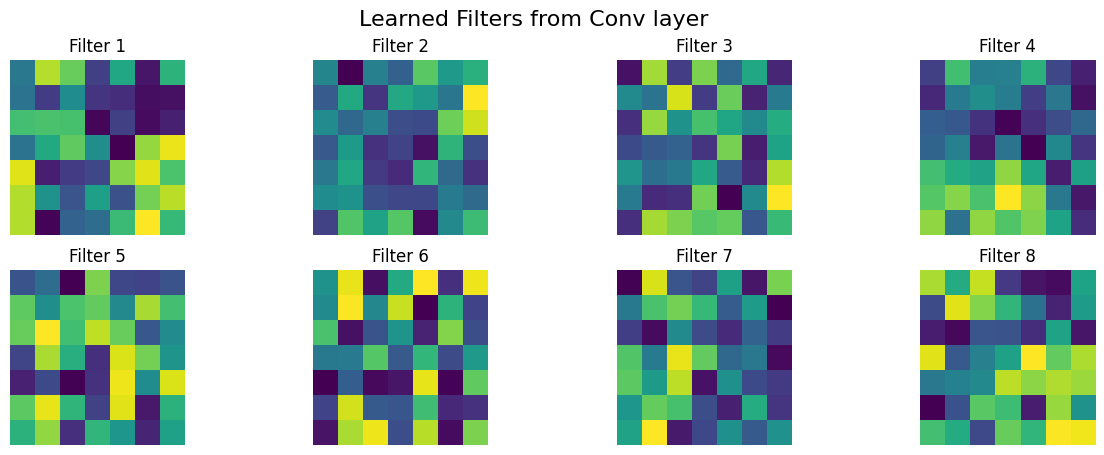

In [10]:
conv_weights = model.conv.weight.detach().numpy() 

plt.figure(figsize=(15, 5))
plt.suptitle("Learned Filters from Conv layer", fontsize=16)
plt.tight_layout()

for i in range(8):
    plt.subplot(2, 4, i + 1)
    filter_ = conv_weights[i, 0]
    plt.imshow(filter_, cmap='viridis')
    plt.axis('off')
    plt.title(f"Filter {i + 1}")

plt.show()

### Loss and accuracy across epochs

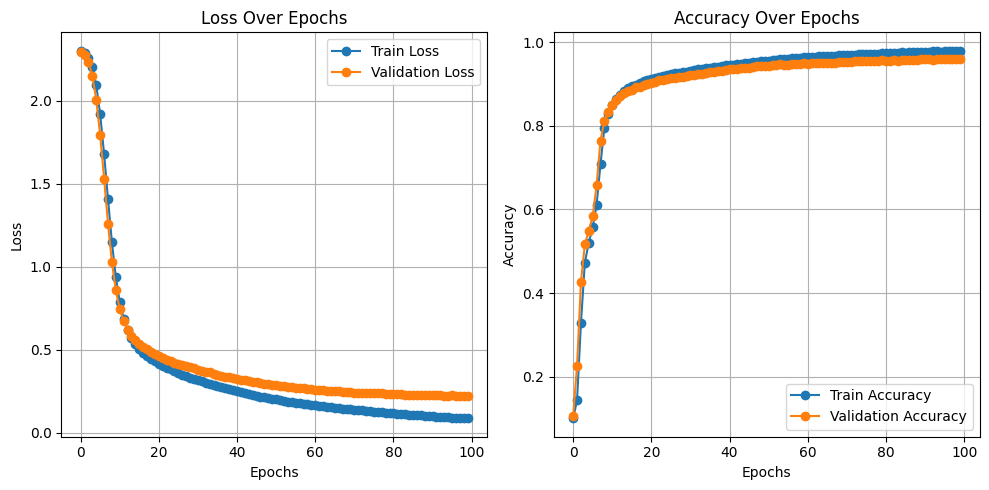

In [11]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), [m["train_loss"] for m in metrics], label="Train Loss", marker='o')
plt.plot(range(epochs), [m["valid_loss"] for m in metrics], label="Validation Loss", marker='o')
plt.title("Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), [m["train_accuracy"] for m in metrics], label="Train Accuracy", marker='o')
plt.plot(range(epochs), [m["valid_accuracy"] for m in metrics], label="Validation Accuracy", marker='o')
plt.title("Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

### More metrics

Accuracy: 0.9600
Precision: 0.9601
Recall: 0.9600
F1 Score: 0.9600


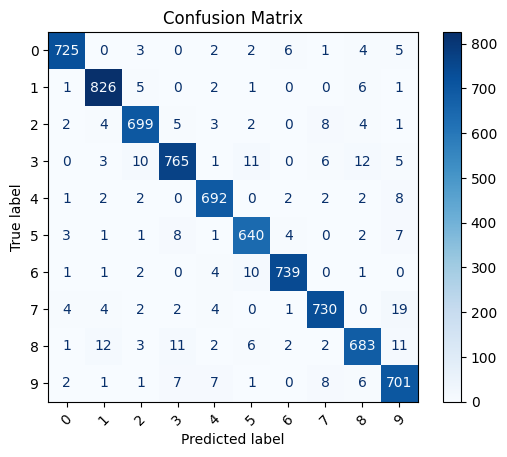

In [12]:
from sklearn.metrics import (
    precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
)

model.eval()

all_labels = []
all_preds = []

with torch.no_grad():
    for images, labels in valid_dl:
        outputs = model(images)
        _, predictions = torch.max(outputs, dim=1)
        all_labels.extend(labels.numpy())
        all_preds.extend(predictions.numpy())

# Calculate metrics
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))

# Plot confusion matrix
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()